In [1]:
import numpy as np
import sys
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import torch
from sklearn.manifold import TSNE

sys.path.append('gan')


In [2]:
training_real = np.load('data/google/data_train.npz')
# test_real = np.load('data/google/data_test.npz')
training_generated = np.load('data_generated/google/generated_data_train.npz')
# test_generated = np.load('data_generated/google/generated_data_test.npz')

In [3]:
real_train_X = torch.from_numpy(training_real['data_feature']).float() #[50000, 2500, 9]
generated_train_X = torch.from_numpy(training_generated['data_feature']).float() #[50000, 2500, 9]
combined_train_X = torch.cat((real_train_X,generated_train_X)).float() #[100000, 2500, 9]

real_train_X_flatten = torch.flatten(real_train_X,1).numpy() #[50000, 22500]
generated_train_X_flatten = torch.flatten(generated_train_X,1).numpy() #[50000, 22500]
combined_train_X_flatten = torch.flatten(combined_train_X,1).numpy() #[100000, 22500]

real_train_Y = training_real['data_attribute'] 
real_train_Y_sk =  np.argmax(real_train_Y,1) #(50000,)  returns a list of the class label, no one hot encoding any more

generated_train_Y = training_generated['data_attribute'] 
generated_train_Y_sk =  np.argmax(generated_train_Y,1) #(50000,)  returns a list of the class label, no one hot encoding any more

# Sampled 1_000

In [5]:
import random
randomList = random.sample(range(0, 50_000), 15_000)


In [5]:
real_train_X_flatten_sampled = real_train_X_flatten[randomList]
pca1 = PCA(n_components=100,random_state=5)
real_train_X_reduced = pca1.fit_transform(real_train_X_flatten_sampled[:])
tsne1 = TSNE(n_components=2,random_state=5)
real_train_X_tsne = tsne1.fit_transform(real_train_X_reduced)

generated_train_X_flatten_sampled = generated_train_X_flatten[randomList]
pca2 = PCA(n_components=100,random_state=5)
generated_train_X_reduced = pca2.fit_transform(generated_train_X_flatten_sampled[:])
tsne2 = TSNE(n_components=2,random_state=5)
generated_train_X_tsne = tsne2.fit_transform(generated_train_X_reduced)


In [6]:
# Just Plot from PCA

real_train_X_flatten_sampled = real_train_X_flatten[randomList]
pca1 = PCA(n_components=2,random_state=5)
real_train_X_pca = pca1.fit_transform(real_train_X_flatten_sampled[:])

generated_train_X_flatten_sampled = generated_train_X_flatten[randomList]
pca2 = PCA(n_components=2,random_state=5)
generated_train_X_pca = pca2.fit_transform(generated_train_X_flatten_sampled[:])


In [7]:
sum(pca1.explained_variance_ratio_)

0.9803092470392585

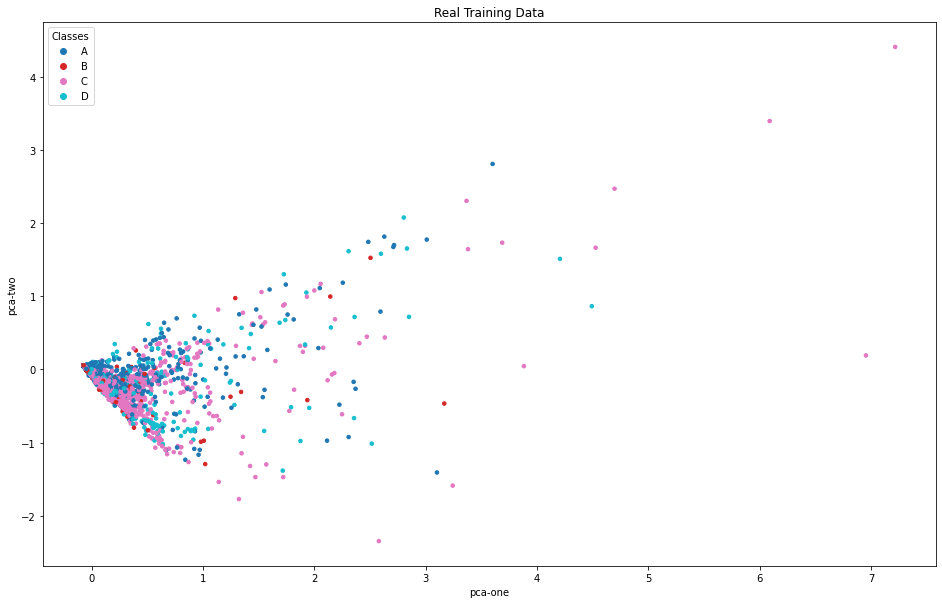

In [10]:
# print(pca1.explained_variance_ratio_)
ax = plt.figure(figsize=(16,10)).gca()
scatter = plt.scatter(
    x=real_train_X_pca[:,0], 
    y=real_train_X_pca[:,1], 
    c=real_train_Y_sk[randomList], 
    cmap='tab10',
    marker=".",
    s=50.,
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_title('Real Training Data')
classes = ['A', 'B', 'C','D']
plt.legend(handles=scatter.legend_elements()[0], labels=classes,title='Classes')
plt.savefig('Real Training Data.png',facecolor='white',dpi=160, bbox_inches='tight')

plt.show()

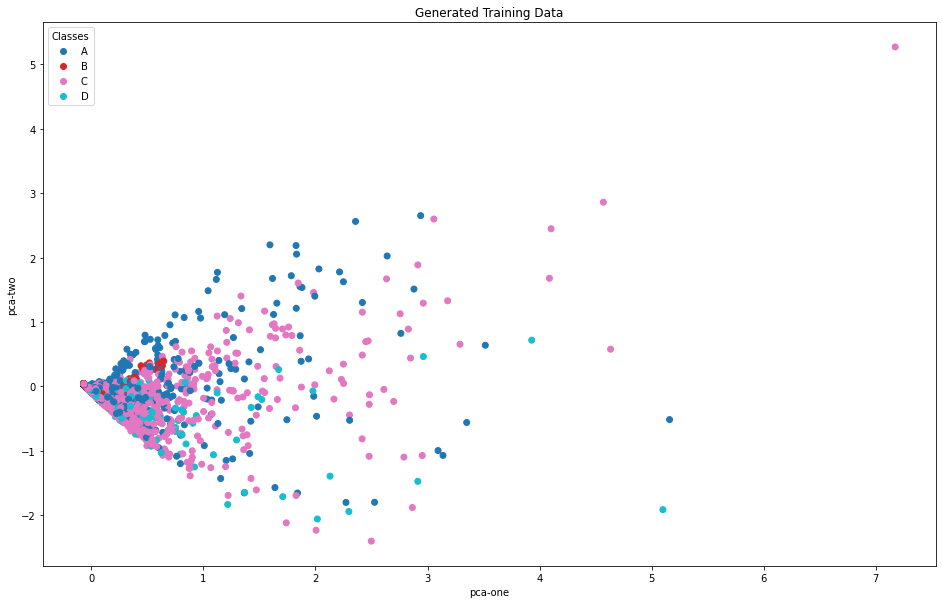

In [9]:
# print(pca2.explained_variance_ratio_)
ax = plt.figure(figsize=(16,10)).gca()
scatter = plt.scatter(
    x=generated_train_X_pca[:,0], 
    y=generated_train_X_pca[:,1], 
    c=generated_train_Y_sk[randomList], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_title('Generated Training Data')
classes = ['A', 'B', 'C','D']
plt.legend(handles=scatter.legend_elements()[0], labels=classes,title='Classes')
plt.savefig('Generated Training Data.png',facecolor='white',dpi=160,bbox_inches='tight')

plt.show()

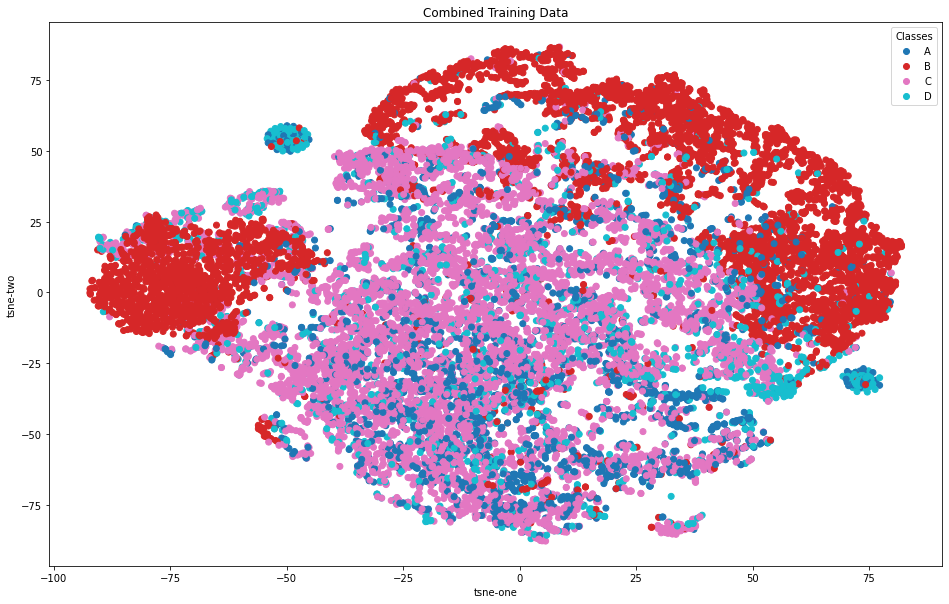

In [10]:
combined_train_X_tsne = np.concatenate((real_train_X_tsne,generated_train_X_tsne))
combined_train_Y_sk = np.concatenate((real_train_Y_sk[randomList],generated_train_Y_sk[randomList]))#[100000, 2500, 9]

ax = plt.figure(figsize=(16,10)).gca()
scatter = plt.scatter(
    x=combined_train_X_tsne[:,0], 
    y=combined_train_X_tsne[:,1], 
    c=combined_train_Y_sk, 
    cmap='tab10'
)
ax.set_xlabel('tsne-one')
ax.set_ylabel('tsne-two')
ax.set_title('Combined Training Data')
classes = ['A', 'B', 'C','D']
plt.legend(handles=scatter.legend_elements()[0], labels=classes,title='Classes')
plt.savefig('Combined Training Data.png',facecolor='white',dpi=160,bbox_inches='tight')

plt.show()

# Full Data

In [4]:
#Reduce from 22500 features to 100 features
pca1 = PCA(n_components=50,random_state=5)
real_train_X_reduced = pca1.fit_transform(real_train_X_flatten[:])
tsne1 = TSNE(n_components=2,random_state=5)
real_train_X_tsne = tsne1.fit_transform(real_train_X_reduced)

In [5]:
pca2 = PCA(n_components=50,random_state=5)
generated_train_X_reduced = pca2.fit_transform(generated_train_X_flatten[:])
tsne2 = TSNE(n_components=2,random_state=5)
generated_train_X_tsne = tsne2.fit_transform(generated_train_X_reduced)

[0.275672   0.11528481 0.08274733 0.05750404 0.04304481 0.0353066
 0.03370626 0.02547214 0.02290266 0.01961472 0.01739915 0.0167212
 0.01298493 0.01220976 0.00945728 0.00903867 0.00811922 0.00688704
 0.00669546 0.00607835 0.0054011  0.00516444 0.0049915  0.00480591
 0.00459993 0.00433711 0.00414246 0.00382595 0.0037637  0.00363371
 0.0034581  0.00313891 0.00307663 0.00287148 0.00270691 0.00259462
 0.00258016 0.00236297 0.00232845 0.00225977 0.00208657 0.00206606
 0.001941   0.00189361 0.00187727 0.00180628 0.00171963 0.00164411
 0.00158521 0.00156003]


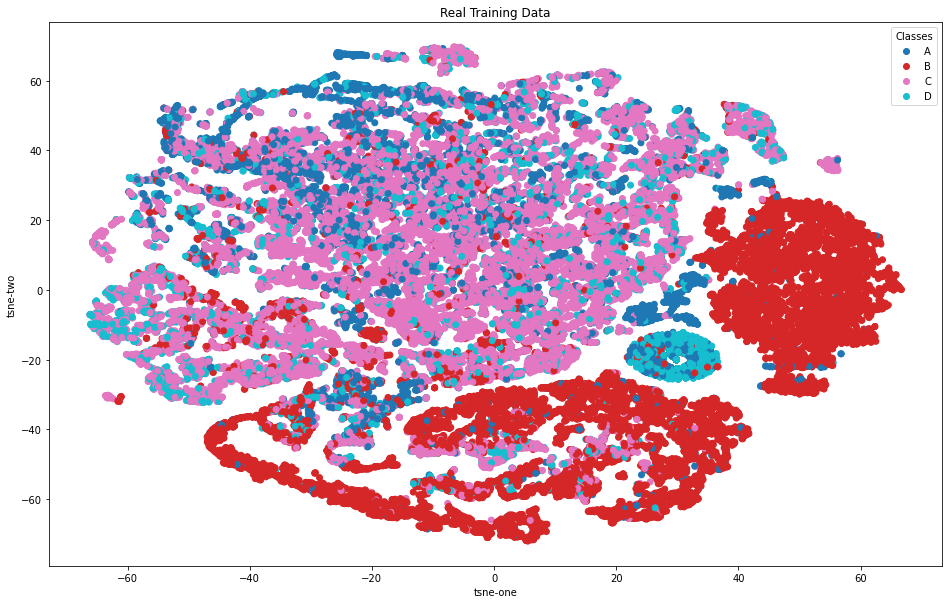

In [6]:
print(pca1.explained_variance_ratio_)
ax = plt.figure(figsize=(16,10)).gca()
scatter = plt.scatter(
    x=real_train_X_tsne[:,0], 
    y=real_train_X_tsne[:,1], 
    c=real_train_Y_sk[:], 
    cmap='tab10'
)
ax.set_xlabel('tsne-one')
ax.set_ylabel('tsne-two')
ax.set_title('Real Training Data')
classes = ['A', 'B', 'C','D']
plt.legend(handles=scatter.legend_elements()[0], labels=classes,title='Classes')
plt.savefig('Real Training Data.png',facecolor='white',dpi=160, bbox_inches='tight')

plt.show()

[0.34011668 0.14518073 0.07100717 0.04570626 0.04128696 0.02823933
 0.02431841 0.01886082 0.01575024 0.01460238 0.01227045 0.01135738
 0.01011736 0.00907787 0.0079071  0.00732604 0.00658389 0.00584291
 0.00563195 0.00522812 0.00457671 0.00441908 0.00430519 0.00407929
 0.00386204 0.00378594 0.00365005 0.00333441 0.00321947 0.00299017
 0.00288813 0.00276262 0.00274436 0.00259673 0.00255052 0.00245299
 0.00237135 0.00229518 0.00217882 0.00214864 0.00209087 0.00195926
 0.00190069 0.00183058 0.00177432 0.00173521 0.00168907 0.00163484
 0.00160762 0.00150358]


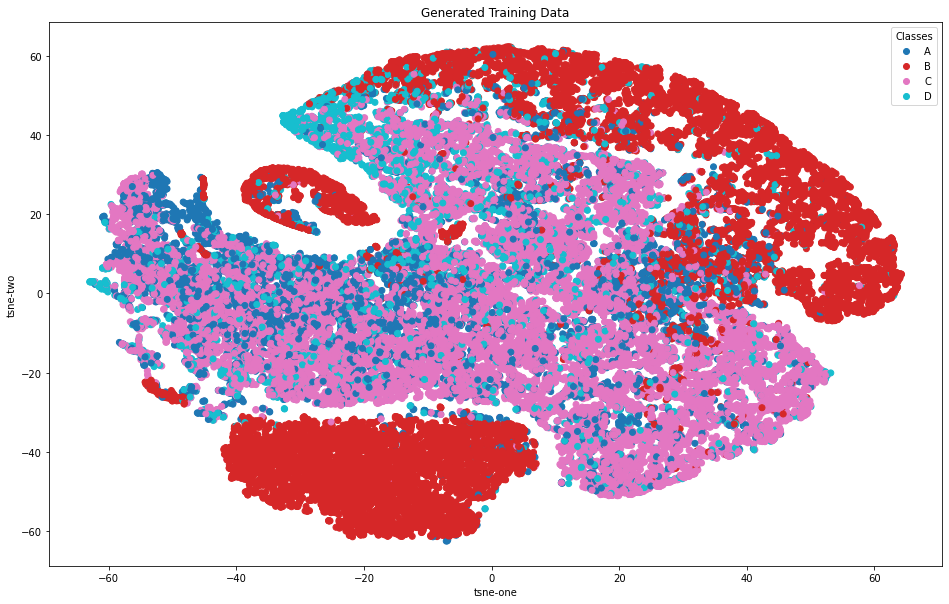

In [7]:
print(pca2.explained_variance_ratio_)
ax = plt.figure(figsize=(16,10)).gca()
scatter = plt.scatter(
    x=generated_train_X_tsne[:,0], 
    y=generated_train_X_tsne[:,1], 
    c=generated_train_Y_sk[:], 
    cmap='tab10'
)
ax.set_xlabel('tsne-one')
ax.set_ylabel('tsne-two')
ax.set_title('Generated Training Data')
classes = ['A', 'B', 'C','D']
plt.legend(handles=scatter.legend_elements()[0], labels=classes,title='Classes')
plt.savefig('Generated Training Data.png',facecolor='white',dpi=160,bbox_inches='tight')

plt.show()

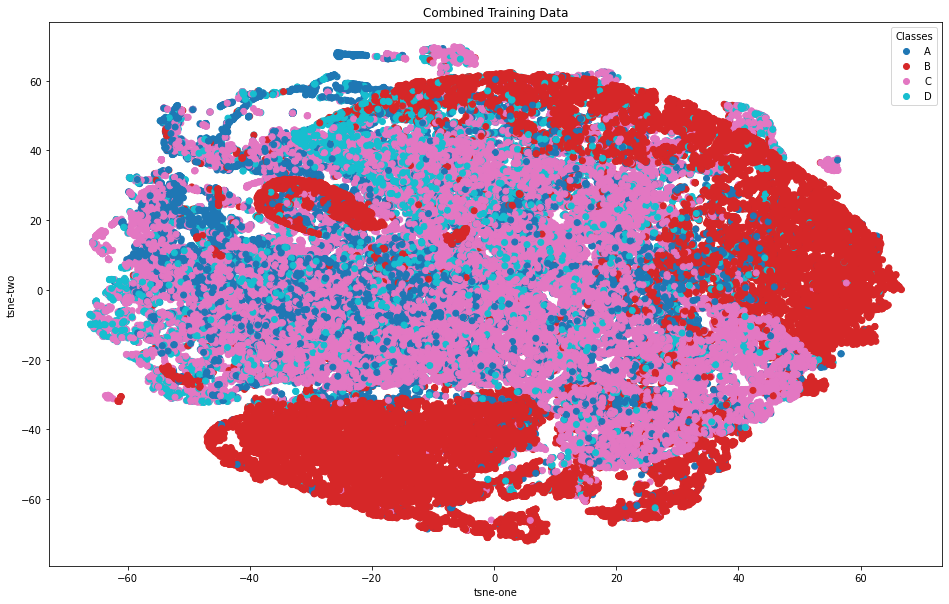

In [8]:
combined_train_X_tsne = np.concatenate((real_train_X_tsne,generated_train_X_tsne))
combined_train_Y_sk = np.concatenate((real_train_Y_sk[:],generated_train_Y_sk[:]))#[100000, 2500, 9]

ax = plt.figure(figsize=(16,10)).gca()
scatter = plt.scatter(
    x=combined_train_X_tsne[:,0], 
    y=combined_train_X_tsne[:,1], 
    c=combined_train_Y_sk, 
    cmap='tab10'
)
ax.set_xlabel('tsne-one')
ax.set_ylabel('tsne-two')
ax.set_title('Combined Training Data')
classes = ['A', 'B', 'C','D']
plt.legend(handles=scatter.legend_elements()[0], labels=classes,title='Classes')
plt.savefig('Combined Training Data.png',facecolor='white',dpi=160,bbox_inches='tight')

plt.show()